# CODING TASK #1: IMPORT KEY LIBRARIES AND DATASETS

In [2]:
# Import key libraries and datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Note that you might need to upgrade Seaborn library
# You will need to restart the notebook again for the changes to take effect
!pip install --upgrade Seaborn


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [4]:
# read the data using Pandas 
icecream_sales_df = pd.read_csv('IceCreamData.csv')

In [5]:
# View the DataFrame
icecream_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
icecream_sales_df.isna().sum()

Temperature    0
Revenue        0
dtype: int64

In [7]:
icecream_sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [8]:
icecream_sales_df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [9]:
# Note that we are using AWS SageMaker 2.72.1
# We will be using the new SageMaker 2.x SDK 
!pip list

Package                              Version
------------------------------------ -----------------
aiobotocore                          2.4.2
aiohttp                              3.8.5
aioitertools                         0.11.0
aiosignal                            1.3.1
alabaster                            0.7.12
anaconda-client                      1.7.2
anaconda-project                     0.8.3
ansi2html                            1.8.0
anyio                                3.7.1
argh                                 0.26.2
argon2-cffi                          21.3.0
argon2-cffi-bindings                 21.2.0
asn1crypto                           1.3.0
astroid                              2.15.6
astropy                              4.3.1
async-timeout                        4.0.2
asynctest                            0.13.0
atomicwrites                         1.3.0
attrs                                23.1.0
autopep8                             1.4.4
autovizwidget                   

**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
 - **Use head and tail methods to print the first and last 9 rows of the dataframe**

In [10]:
print(icecream_sales_df.tail(9))

     Temperature     Revenue
491    34.472169  809.352519
492    23.056214  552.819351
493    14.931506  377.430928
494    25.112066  571.434257
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388


In [11]:
print(icecream_sales_df.head(9))

   Temperature     Revenue
0    24.566884  534.799028
1    26.005191  625.190122
2    27.790554  660.632289
3    20.595335  487.706960
4    11.503498  316.240194
5    14.352514  367.940744
6    13.707780  308.894518
7    30.833985  696.716640
8     0.976870   55.390338


# CODING TASK #2: EXPLORE THE DATA

In [12]:
icecream_sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [13]:
# Apply the describe method to obtain a statistical summary about your data
icecream_sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
 - **Find the minimimum revenue in the dataframe using two different methods**
 - **What is the revenue corresponding to maximum temperature?**

In [14]:
#My Solution
#Find minimum revenue
min_revenue = icecream_sales_df.Revenue.min()
min_revenue


10.0

In [15]:
#Revenue corresponding to max temp
revenue_max = icecream_sales_df[icecream_sales_df.Temperature == icecream_sales_df['Temperature'].max()]
revenue_max

,Temperature,Revenue
444,45.0,1000.0


# CODING TASK #3: PERFORM DATA VISUALIZATION 

In [16]:
fig = plt.figure();
icecream_sales_df['Temperature'].hist(bins = 20, figsize = (9, 5), color = 'b');
fig.suptitle('Temperature Histogram');

In [17]:
# plot pairplot
sns.pairplot(icecream_sales_df);

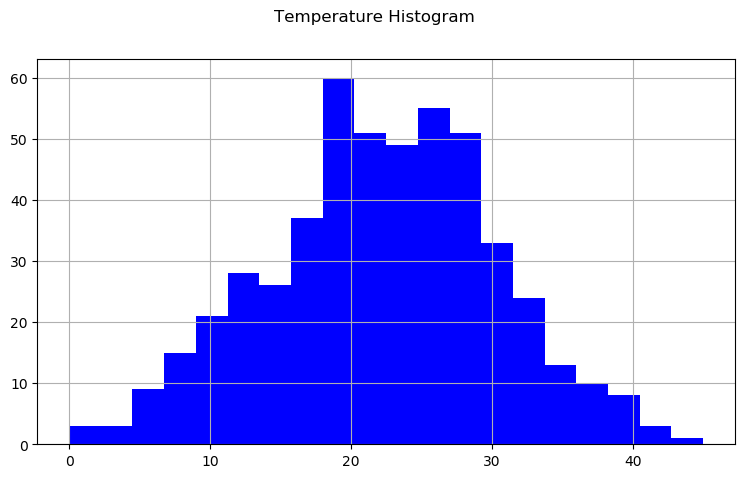

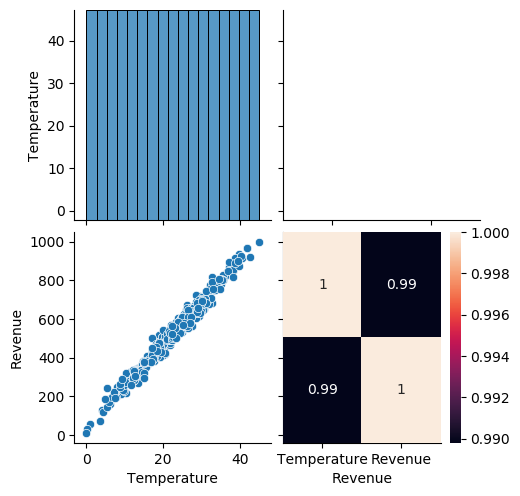

In [18]:
# PLot the correlation Matrix
corr_matrix = icecream_sales_df.corr()
sns.heatmap(corr_matrix, annot = True);
plt.show()

**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
 - **Plot the histogram of the sales revenue using 25 bins**
 - **Set the histogram color to green**

# CODING TASK #4: PREPARE THE DATA FOR MODEL TRAINING

In [19]:
# Separate the data into input X and Output y
X = icecream_sales_df[['Temperature']]
y = icecream_sales_df[['Revenue']]


In [20]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [21]:
y

,Revenue
0,534.799028
1,625.190122
2,660.632289
3,487.706960
4,316.240194
...,...
495,524.746364
496,755.818399
497,306.090719
498,566.217304


In [22]:
# Check out the shape of the input
X.shape

(500, 1)

In [23]:
# Check out the shape of the output
y.shape

(500, 1)

In [24]:
# Convert the datatype to float32
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [25]:
# Only take the numerical variables and scale them
X 

array([[24.566885 ],
       [26.005192 ],
       [27.790554 ],
       [20.595335 ],
       [11.503498 ],
       [14.352514 ],
       [13.70778  ],
       [30.833984 ],
       [ 0.97687  ],
       [31.669464 ],
       [11.455254 ],
       [ 3.6646695],
       [18.811825 ],
       [13.624509 ],
       [39.53991  ],
       [18.48314  ],
       [25.935375 ],
       [42.51528  ],
       [29.589481 ],
       [21.775948 ],
       [25.457836 ],
       [15.214569 ],
       [22.619316 ],
       [16.25872  ],
       [23.881725 ],
       [18.9783   ],
       [15.661465 ],
       [29.185045 ],
       [19.02461  ],
       [35.12015  ],
       [24.183937 ],
       [15.23119  ],
       [ 8.790953 ],
       [18.233229 ],
       [35.628925 ],
       [37.05754  ],
       [22.28455  ],
       [17.517075 ],
       [31.737919 ],
       [17.049738 ],
       [23.003489 ],
       [ 8.755554 ],
       [18.775358 ],
       [14.109661 ],
       [18.633913 ],
       [15.676487 ],
       [20.947914 ],
       [30.63

In [26]:
y

array([[ 534.799  ],
       [ 625.1901 ],
       [ 660.63226],
       [ 487.70697],
       [ 316.2402 ],
       [ 367.94073],
       [ 308.89453],
       [ 696.7166 ],
       [  55.39034],
       [ 737.80084],
       [ 325.9684 ],
       [  71.16016],
       [ 467.44672],
       [ 289.54092],
       [ 905.4776 ],
       [ 469.90903],
       [ 648.21   ],
       [ 921.5083 ],
       [ 649.56116],
       [ 534.62286],
       [ 612.15393],
       [ 353.32562],
       [ 524.23615],
       [ 374.23114],
       [ 523.1246 ],
       [ 473.60434],
       [ 402.45532],
       [ 679.3178 ],
       [ 517.53406],
       [ 809.67206],
       [ 528.38043],
       [ 356.09802],
       [ 237.76392],
       [ 418.13727],
       [ 809.46344],
       [ 870.7659 ],
       [ 550.2785 ],
       [ 405.66144],
       [ 740.93567],
       [ 501.733  ],
       [ 539.688  ],
       [ 242.2362 ],
       [ 421.6215 ],
       [ 358.00284],
       [ 467.63107],
       [ 396.93564],
       [ 500.92508],
       [ 651.

In [27]:
# split the data into training and testing using SkLearn Library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**
 - **Split the data into 70% for training and the rest for testing**
 - **Verify that the split was successful**

In [28]:
#My Solution
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [29]:
#Verify that the data split was successful
X_train.shape

(400, 1)

In [30]:
y_train.shape

(400, 1)

# CODING TASK #5: TRAIN A SIMPLE LINEAR REGRESSION MODEL USING SCIKIT LEARN (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [31]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression(fit_intercept = True)
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.9795740281317775

In [33]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[21.504215]]
Linear Model Coefficient (b):  [43.203644]


**PRACTICE OPPORTUNITY #5 [OPTIONAL]:**
- **Retrain the model while setting the fit_intercept = False, what do you notice?**

In [34]:
#My Solution
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression(fit_intercept = False)
linear_regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [35]:
linear_reg_accuracy = linear_regressor.score(X_test, y_test)
linear_reg_accuracy

0.9695751582561984

In [36]:
print('Linear Model Coefficient (m): ', linear_regressor.coef_)
print('Linear Model Coefficient (b): ', linear_regressor.intercept_)

Linear Model Coefficient (m):  [[23.22301]]
Linear Model Coefficient (b):  0.0


# CODING TASK #6: ASSESS TRAINED MODEL PERFORMANCE (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [37]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [38]:
y_predict

array([[697.5294 ],
       [530.34155],
       [658.9496 ],
       [158.00201],
       [621.099  ],
       [366.3929 ],
       [580.8602 ],
       [650.97363],
       [427.50974],
       [627.8131 ],
       [893.4784 ],
       [422.90012],
       [636.69995],
       [571.9043 ],
       [260.32404],
       [469.30188],
       [862.4413 ],
       [294.6855 ],
       [688.93665],
       [873.8871 ],
       [497.5689 ],
       [188.89914],
       [465.17355],
       [449.2832 ],
       [236.56439],
       [645.30493],
       [368.3086 ],
       [819.86194],
       [622.61584],
       [546.93225],
       [655.3197 ],
       [546.55835],
       [519.57764],
       [320.64615],
       [585.99475],
       [470.046  ],
       [461.1008 ],
       [630.5442 ],
       [635.1981 ],
       [784.5006 ],
       [411.63095],
       [800.5227 ],
       [478.6069 ],
       [440.23395],
       [701.99194],
       [572.82263],
       [758.23816],
       [640.81775],
       [381.98   ],
       [245.41809],


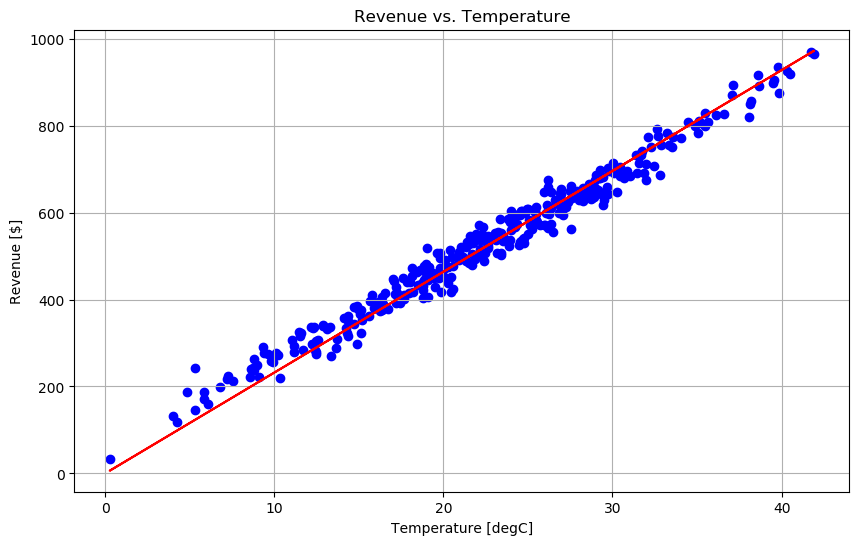

In [59]:
plt.figure(figsize = (10, 6))
plt.scatter(X_train, y_train, color = 'b')
plt.plot(X_train, regresssion_model_sklearn.predict(X_train), color = 'red')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue vs. Temperature')
plt.grid()
plt.show()

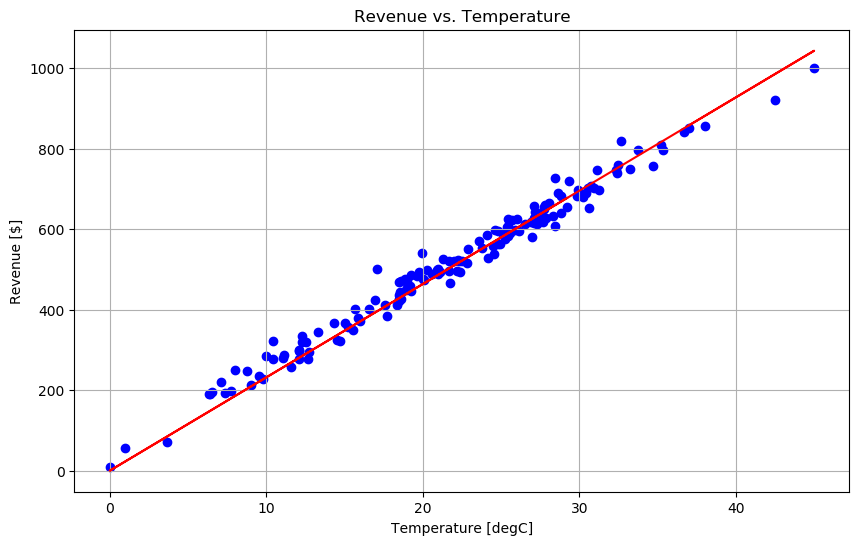

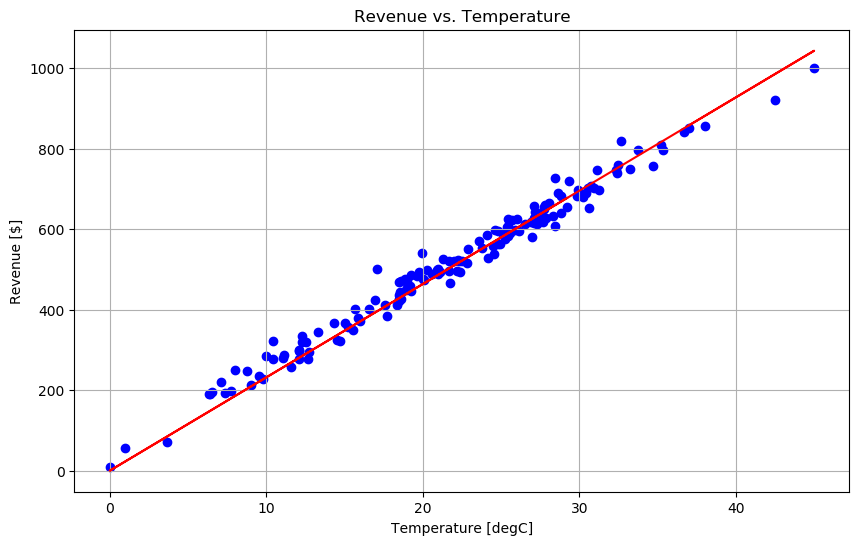

In [61]:
plt.figure(figsize = (10, 6))
plt.scatter(X_test, y_test, color = 'b')
plt.plot(X_test, regresssion_model_sklearn.predict(X_test), color = 'red')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue vs. Temperature')
plt.grid()
plt.show()

**PRACTICE OPPORTUNITY #6 [OPTIONAL]:**
- **Use the trained model, obtain the revenue when the outside air temperature is 35 degC and 10 degC?**
- **Perform a sanity check to examine if these results make sense!**

In [67]:
#My Solution
temperature = [[35]]
revenue = regresssion_model_sklearn.predict(temperature)
revenue

array([[811.6913414]])

# GREAT JOB! 

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
 - **Use head and tail methods to print the first and last 9 rows of the dataframe**

In [41]:
icecream_sales_df.head(9)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338


In [42]:
icecream_sales_df.tail(9)

,Temperature,Revenue
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


**PRACTICE OPPORTUNITY #2 SOLUTION:**
 - **Find the minimimum revenue in the dataframe using two different methods**
 - **What is the revenue corresponding to maximum temperature?**

In [43]:
icecream_sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [44]:
icecream_sales_df['Revenue'].min()

10.0

In [45]:
icecream_sales_df[icecream_sales_df ['Temperature'] == icecream_sales_df['Temperature'].max()]

,Temperature,Revenue
444,45.0,1000.0


**PRACTICE OPPORTUNITY #3 SOLUTION:**
 - **Plot the histogram of the sales revenue using 25 bins**
 - **Set the histogram color to green**

In [46]:
fig = plt.figure();
icecream_sales_df['Revenue'].hist(bins = 25, figsize = (12, 7), color = 'g');
fig.suptitle('Sales Revenue Histogram');

**PRACTICE OPPORTUNITY #4 SOLUTION:**
 - **Split the data into 70% for training and the rest for testing**
 - **Verify that the split was successful**

In [47]:
# split the data into training and testing using SkLearn Library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [48]:
X_train.shape

(350, 1)

In [49]:
X_test.shape

(150, 1)

In [50]:
y_train.shape

(350, 1)

In [51]:
y_test.shape

(150, 1)

In [52]:
X_train

array([[21.144047 ],
       [27.529232 ],
       [21.540459 ],
       [27.931349 ],
       [36.569115 ],
       [26.078405 ],
       [13.364313 ],
       [18.148952 ],
       [26.250746 ],
       [29.718515 ],
       [ 9.40348  ],
       [ 6.0938973],
       [17.360731 ],
       [15.588061 ],
       [11.569644 ],
       [12.209683 ],
       [15.992347 ],
       [26.923605 ],
       [ 9.8125105],
       [40.30377  ],
       [13.301796 ],
       [24.778675 ],
       [15.676487 ],
       [18.775358 ],
       [ 9.900293 ],
       [16.191298 ],
       [35.094795 ],
       [15.1029215],
       [34.061672 ],
       [20.475023 ],
       [27.57296  ],
       [23.087664 ],
       [17.19943  ],
       [10.119737 ],
       [19.113653 ],
       [29.241753 ],
       [31.579988 ],
       [24.949715 ],
       [17.65684  ],
       [29.589481 ],
       [20.153345 ],
       [14.379697 ],
       [28.547987 ],
       [27.7805   ],
       [18.633913 ],
       [12.189418 ],
       [11.503498 ],
       [17.09

**PRACTICE OPPORTUNITY #5 SOLUTION:**
- **Retrain the model while setting the fit_intercept = False, what do you notice?**

In [53]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression(fit_intercept = False)
regresssion_model_sklearn.fit(X_train, y_train)

regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[23.191181]]
Linear Model Coefficient (b):  0.0


**PRACTICE OPPORTUNITY #6 SOLUTION:**
- **Use the trained model, obtain the revenue when the outside air temperature is 35 degC and 10 degC?**
- **Perform a sanity check to examine if these results make sense!**

In [54]:
temperature = [[10]]
revenue = regresssion_model_sklearn.predict(temperature)
print(revenue)

temperature = [[35]] 
revenue = regresssion_model_sklearn.predict(temperature)
print(revenue)

[[231.91181183]]
[[811.6913414]]
